### 基于相似度的酒店推荐

In [2]:
import random
import re

import pandas as pd
import numpy as np

import cufflinks
from plotly.offline import iplot   # 可视化工具包
cufflinks.go_offline()

In [3]:
df = pd.read_csv('./data/Seattle_Hotels.csv')

In [4]:
df.head()

,name,address,desc
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the..."
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat..."
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ..."
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...


##### 文本处理工具包

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vectorizer = CountVectorizer()

In [7]:
transfer = vectorizer.fit(df.desc)
vec = transfer.transform(df.desc)

In [8]:
vec.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [9]:
words = vec.sum(axis=0)

In [10]:
words_freq = {word: words[0, idx] for word, idx in transfer.vocabulary_.items()}

In [11]:
words

matrix([[ 1, 11, 11, ...,  2,  6,  2]], dtype=int64)

In [12]:
words_freq = sorted(words_freq.items(), key=lambda item:item[1], reverse=True)

In [13]:
words_df = pd.DataFrame(words_freq, columns=['word', 'count'])

In [14]:
words_df.head()

,word,count
0,the,1258
1,and,1062
2,of,536
3,seattle,533
4,to,471


#####  1、未去除停用词前的词频统计及可视化

In [15]:
def get_top_words(corpus, n=10):
    vectorizer = CountVectorizer()
    transfer = vectorizer.fit(corpus)
    vec = transfer.transform(corpus)
    words = vec.sum(axis=0)
    words_freq = {word: words[0, idx] for word, idx in transfer.vocabulary_.items()}
    words_freq = sorted(words_freq.items(), key=lambda item:item[1], reverse=True)
    return words_freq[:n]

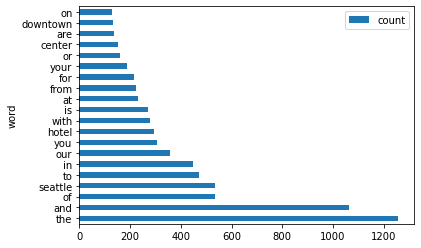

In [16]:
top_words_df = get_top_words(df.desc, 20)
top_words_df = pd.DataFrame(top_words_df, columns=['word', 'count'])
top_words_df.plot(x='word', y='count', kind='barh')

In [17]:
top_words_df.iplot(x='word', y='count', kind='barh', yTitle='Count', linecolor='red', title='top 20 before remove stopwords')

##### 2、去除停用词及词频统计可视化

In [18]:
def get_rm_stop_words(corpus, n=10):
    vectorizer = CountVectorizer(stop_words='english')
    transfer = vectorizer.fit(corpus)
    vec = transfer.transform(corpus)
    words = vec.sum(axis=0)
    words_freq = {word: words[0, idx] for word, idx in transfer.vocabulary_.items()}
    words_freq = sorted(words_freq.items(), key=lambda item:item[1], reverse=True)
    return words_freq[:n]

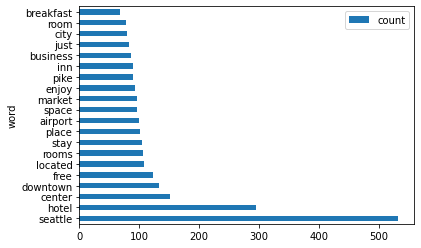

In [19]:
top_words_rm = get_rm_stop_words(df.desc, 20)
top_words_rm = pd.DataFrame(top_words_rm, columns=['word', 'count'])
top_words_rm.plot(x='word', y='count', kind='barh')

In [20]:
top_words_rm.iplot(x='word', y='count', kind='barh', yTitle='Count', linecolor='red', title='top 20 after remove stopwords')

##### 3、N-gram模型
GRAM基本思想：是将文本里面的内容按照字节进行大小为n的滑动窗口操作，形成了长度是n的字节片段序列

In [21]:
def get_rm_stop_n_words(corpus, n=10):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 3))
    transfer = vectorizer.fit(corpus)
    vec = transfer.transform(corpus)
    words = vec.sum(axis=0)
    words_freq = {word: words[0, idx] for word, idx in transfer.vocabulary_.items()}
    words_freq = sorted(words_freq.items(), key=lambda item:item[1], reverse=True)
    return words_freq[:n]

In [22]:
top_words = get_rm_stop_n_words(df.desc, 20)
top_words = pd.DataFrame(top_words, columns=['word', 'count'])
top_words.iplot(x='word', y='count', kind='barh', yTitle='Count', linecolor='red', title='top 20 after remove stopwords with n-gram')

#### 数据集中描述的统计

In [23]:
df['word_count'] = df.desc.apply(lambda item: len(item.split(' ')))

In [24]:
df.head()

,name,address,desc,word_count
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the...",184
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat...",152
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ...",147
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...,151
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...,151


In [25]:
df.word_count.iplot(kind='hist', bins=50)

#### 文本处理

In [26]:
import re
from nltk.corpus import stopwords

In [27]:
regex = re.compile('[^\w #+]')
stop_words = set(stopwords.words('english'))

def clean_txt(text):
    text.lower()
    text = regex.sub(' ', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['desc_clean'] = df['desc'].apply(clean_txt)

In [28]:
df.head()

,name,address,desc,word_count,desc_clean
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the...",184,Located southern tip Lake Union Hilton Garden ...
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat...",152,Located city vibrant core Sheraton Grand Seatt...
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ...",147,Located heart downtown Seattle award winning C...
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...,151,What near hotel downtown Seattle location The ...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...,151,Situated amid incredible shopping iconic attra...


In [29]:
df.set_index('name', inplace=True)

In [30]:
df.head()

,address,desc,word_count,desc_clean
name,,,,
Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the...",184,Located southern tip Lake Union Hilton Garden ...
Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat...",152,Located city vibrant core Sheraton Grand Seatt...
Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ...",147,Located heart downtown Seattle award winning C...
Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...,151,What near hotel downtown Seattle location The ...
The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...,151,Situated amid incredible shopping iconic attra...


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
transfer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), stop_words='english')

In [33]:
tfidf_matrix = transfer.fit_transform(df.desc_clean)

In [36]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
from sklearn.metrics.pairwise import linear_kernel

In [38]:
# 余弦相似度
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [43]:
cosine_similarity

array([[1.        , 0.01406466, 0.03408767, ..., 0.01595671, 0.00242846,
        0.00738648],
       [0.01406466, 1.        , 0.02200929, ..., 0.01636756, 0.00437559,
        0.00912778],
       [0.03408767, 0.02200929, 1.        , ..., 0.02413103, 0.00599561,
        0.01058267],
       ...,
       [0.01595671, 0.01636756, 0.02413103, ..., 1.        , 0.01280813,
        0.00886697],
       [0.00242846, 0.00437559, 0.00599561, ..., 0.01280813, 1.        ,
        0.00171037],
       [0.00738648, 0.00912778, 0.01058267, ..., 0.00886697, 0.00171037,
        1.        ]])

In [42]:
indices = pd.Series(df.index)
indices[:5]

0    Hilton Garden Seattle Downtown
1            Sheraton Grand Seattle
2     Crowne Plaza Seattle Downtown
3     Kimpton Hotel Monaco Seattle 
4                The Westin Seattle
Name: name, dtype: object

In [54]:
def recommendations(name, cosine_similarity):
    recommended_hotels = []
    idx = indices[indices == name].index[0]
    score_series = pd.Series(cosine_similarity[idx]).sort_values(ascending=False)
    for i in score_series[1:11].index:
        recommended_hotels.append(df.index[i])
    return recommended_hotels

In [55]:
# 获取描述信息接近的酒店名称
recommendations('Hilton Garden Seattle Downtown', cosine_similarity)

['Silver Cloud Inn - Seattle Lake Union',
 'Staybridge Suites Seattle Downtown - Lake Union',
 'Residence Inn by Marriott Seattle Downtown/Lake Union',
 'The Loyal Inn',
 'The Arctic Club Seattle - a DoubleTree by Hilton Hotel',
 'Embassy Suites by Hilton Seattle Tacoma International Airport',
 'The Charter Hotel Seattle, Curio Collection by Hilton',
 'MarQueen Hotel',
 'Residence Inn by Marriott Seattle Downtown/Convention Center',
 'EVEN Hotel Seattle - South Lake Union']